# Is Fandango Still Inflating Ratings?

In October 2015, a data journalist named Walt Hickey analyzed movie ratings on the popular website Fandango. He found evidence to suggest that Fandango's rating system was inflated and not the actual true value. For example a movie with an actual rating of 3.5 would be rounded up to 4.0. Link to his [article](https://fivethirtyeight.com/features/fandango-movies-ratings/).

The goal of this project is to analyze more recent data (2016-2017) and determine whether there has been any change in Fandango's rating system.

Here's a [Link](https://github.com/fivethirtyeight/data/tree/master/fandango) to the dataset analyzed by Walt Hickey.

[Link](https://github.com/mircealex/Movie_ratings_2016_17) to most recent dataset by Mircealex.

In [1]:
import pandas as pd
import numpy as np
# read in data
ratings_15 = pd.read_csv('fandango_score_comparison.csv')
ratings_15.head(4)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5


In [2]:
ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')
ratings_16_17.head(4)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0


In [3]:
# filter datasets to contain Fandango only info
ratings_15 = ratings_15[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
ratings_15.head(4)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5


In [4]:
# filter datasets to contain Fandango only info
ratings_16_17 = ratings_16_17[['movie', 'year','fandango']]
ratings_16_17.head(4)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5


The goal is to determine whether Fandango's rating system is still inflated. The population of interest is made up of all the movies on Fandango's website, regardless of release year. 

From Hickey's article and the README.md of the datasets repository, the sample criteria he chose was:
- The movie had to have at least 30 user reviews at the time of sampling (August 2015).
- The movie must have had tickets on sale in 2015.

Sample criteria of the other dataset:
- The movie must have been released in 2016 or later.
- The movie must have had a sizeable amount of ratings and reviews (unclear how many).

Both sample criterias are selective and not representative of the population of interest. Not every movie had the same chance of being selected (ex. movies with less than 30 user reviews). For the analysis of this project these samples will not be useful for the population to be described.

# Changing the Goal of Analysis
At this point there is two alternatives, either collect new data or change the goal of analysis by placing some limitations on it. The latter solution would be faster and last time consuming.

The new goal in this project is to determine if there is any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. 

# Isolating the Samples
Two new populations to describe and compare:
- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

To determine if a movie is popular, Hickey's benchmark of 30+ fan ratings will be used.

The second dataset doesn't provide a count for the number of fan ratings. One quick way to check for sample representativity is to randomly sample 10 movies from the dataset and check Fandango's  website.

In [5]:
# random sample of second dataset
ratings_16_17.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Fan Ratings for the samples obtained above as of April 2018.

|Movie|	Fan ratings|
|-----|------------|
|Mechanic: Resurrection|	2247|
|Warcraft|	7271|
|Max Steel|	493|
|Me Before You|	5263|
|Fantastic Beasts and Where to Find Them|	13400|
|Cell|	17|
|Genius|	127|
|Sully|	11877|
|A Hologram for the King|	500|
|Captain America: Civil War|	35057|

90% of the movies above are popular. This is enough confirmation to move forward.

In [6]:
# creating new Year column
ratings_15['Year'] = ratings_15['FILM'].str[-5:-1]
# isolating first datset to movies released in 2015 only
ratings_15['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [7]:
fandango_15 = ratings_15[ratings_15['Year'] == '2015'].copy()
fandango_15['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [8]:
ratings_16_17['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [9]:
# isolating first datset to movies released in 2016 only
fandango_16 = ratings_16_17[ratings_16_17['year'] == 2016].copy()
fandango_16['year'].value_counts()

2016    191
Name: year, dtype: int64

# Comparing Distribution Shapes for 2015 and 2016

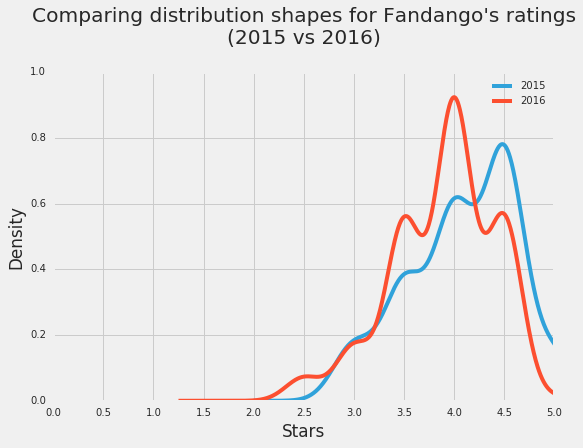

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
fandango_15['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(8,5.5))
fandango_16['fandango'].plot.kde(label='2016', legend=True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)", y = 1.07)
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(np.arange(0,5.1,.5))
plt.show()

Noticeable Patterns on the chart above
- Both distributions are strongly skewed to the left
- The 2016 distribution is slightly shifted to the left compared to 2015 distribution.

The slightly left shift of 2016 distributions shows that the ratings for 2016 popular movies were slightly lower compared to 2015 popular movies.

# Comparing Relative Frequencies

In [11]:
print('2015' + '\n' + '-' * 16)
fandango_15['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [12]:
print('2016' + '\n' + '-' * 16)
fandango_16['fandango'].value_counts(normalize=True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

The differences are more obvious when comparing relative frequencies. As shown above the number of movies that received a score of 4.5 or higher in 2016 is lower compared to 2015.  

No popular movies on Fandango had a rating lower than 3.0 in 2015, while in 2016 the minimum rating was 2.5. 

In 2016 under 1% of movies had a perfect score. Also more popular movies received 3.5 or 4.0 stars in 2016 compared to 2015. This challenges the direction of the change on the kernel density plots.

# Determining the Direction of the Change
Taking a couple summary statistics to get a more precise picture about the direction of the difference.

In [28]:
# summarry statistics fandango_15
mean_15 = fandango_15['Fandango_Stars'].mean()
median_15 = fandango_15['Fandango_Stars'].median()
mode_15 = fandango_15['Fandango_Stars'].mode()[0]

# summary statistics fandango_16
mean_16 = fandango_16['fandango'].mean()
median_16 = fandango_16['fandango'].median()
mode_16 = fandango_16['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] =[mean_15, median_15, mode_15]
summary['2016'] = [mean_16, median_16, mode_16]
summary.index = ['mean', 'median', 'mode']

summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


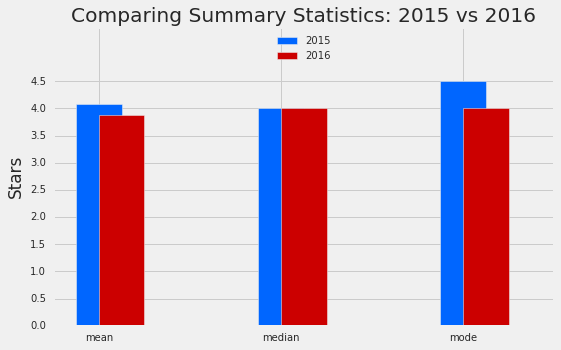

In [45]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25, rot = 0, figsize = (8,5))

plt.title('Comparing Summary Statistics: 2015 vs 2016')
plt.ylim(0,5.5)
plt.yticks(np.arange(0, 5,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

The mean rating for 2016 was about 0.2 lower compared to 2015. The median was the same (4.0 stars) and the mode was .5 higher in 2015 compared to 2016.

# Conclusion
On average, popular movie ratings on Fandango for 2016 was slightly lower compared to 2015 popular movie ratings. Can't determine exactly what caused the change, but it's possible that Walt Hickey's analysis had an influence on the change in biased rating system.